In [9]:
import os, sys
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import requests
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:

if not os.path.exists('tiny_nerf_data.npz'):
    # save data to file 
    !curl  https://people.eecs.berkeley.edu/~bmild/nerf/tiny_nerf_data.npz --output tiny_nerf_data.npz

In [1]:
data = np.load("colmap.npz")

# Images
images = data["images"]
# Camera extrinsics (poses)
tform_cam2world = data["poses"]
# Focal length (intrinsics)
focal_length = data["focal"]

# Height and width of each image
height, width = images.shape[1:3]

# Near and far clipping thresholds for depth values.
near_thresh = 2.
far_thresh = 6.

# Hold one image out (for test).
testimg, testpose = images[101], tform_cam2world[101]
testimg = torch.from_numpy(testimg)

# Map images to device
images = torch.from_numpy(images[:100, ..., :3])

NameError: name 'np' is not defined

In [ ]:
tform_cam2world[0]

array([[-9.9990219e-01,  4.1922452e-03, -1.3345719e-02, -5.3798322e-02],
       [-1.3988681e-02, -2.9965907e-01,  9.5394367e-01,  3.8454704e+00],
       [-4.6566129e-10,  9.5403719e-01,  2.9968831e-01,  1.2080823e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

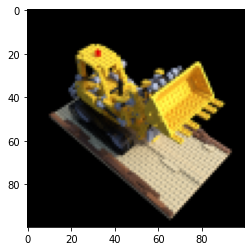

In [16]:
plt.imshow(testimg.detach().cpu().numpy())
plt.show()